# <b><font size=7 color='orange'> Computer Assignment 2 - Task 1 </font></b>

<b><font color="orange" size="6">Collaborators:</font></b><br>
<font color="orange" size="5">
  <i>
     Mehrad Liviyan - 810101501<br>
     Shayan Saeedi - 810101442
  </i>
</font>


## Install Libraries

In [3]:
# !pip install opencv-python
# !pip install --upgrade matplotlib scipy opencv-python pybind11

## Show Generated Images 


<div dir="rtl">
در ابتدا کد Captch_Generation رو ران می کنیم و در یک فولدر به نام Genearted_Captch ذخیره می کنیم.

Image 01.png loaded successfully


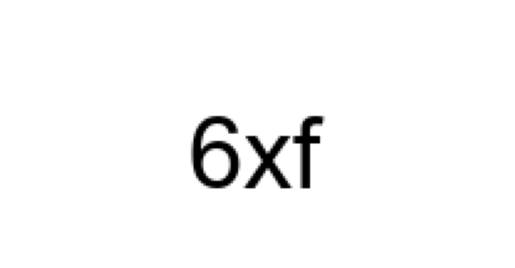

Image 02.png loaded successfully


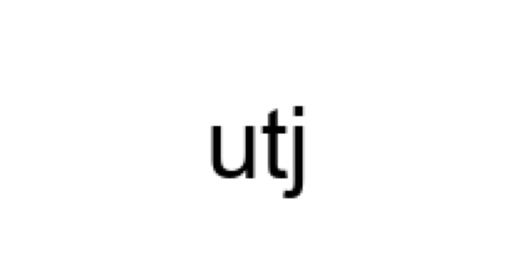

Image 03.png loaded successfully


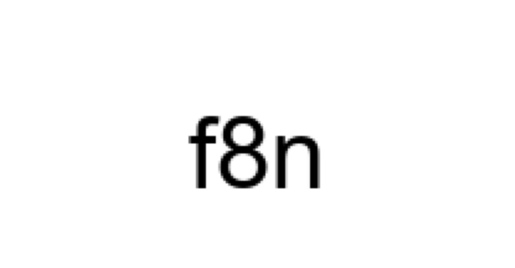

Image 04.png loaded successfully


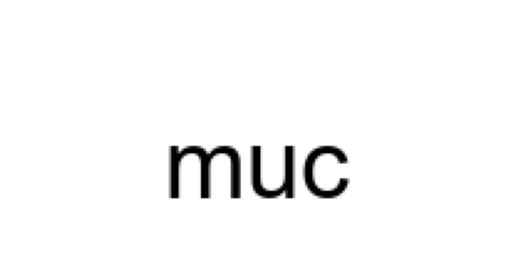

Image 05.png loaded successfully


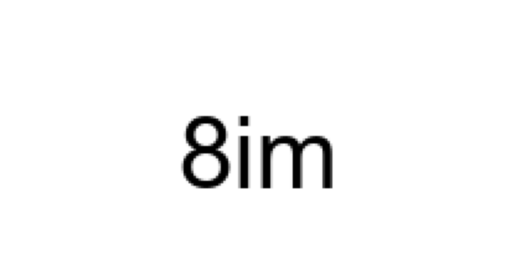

Image 06.png loaded successfully


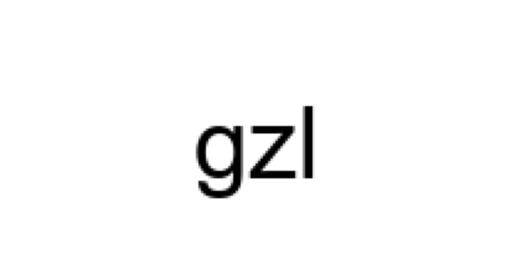

Image 07.png loaded successfully


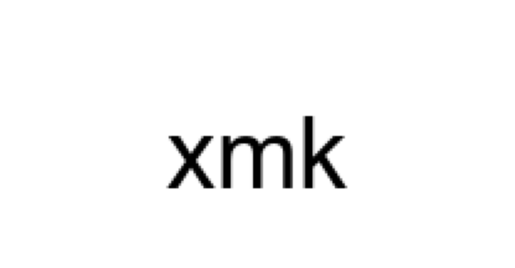

Image 08.png loaded successfully


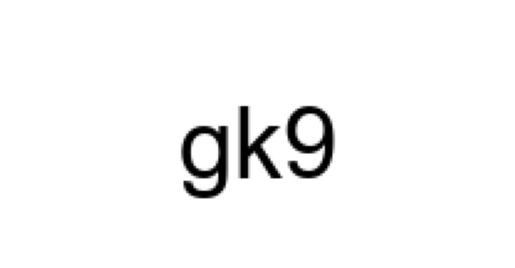

Image 09.png loaded successfully


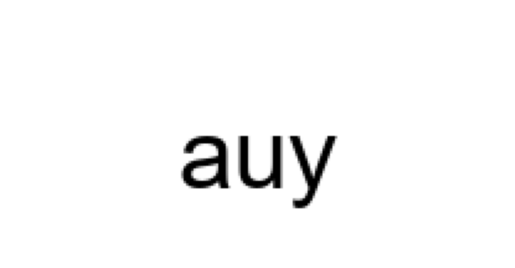

Image 10.png loaded successfully


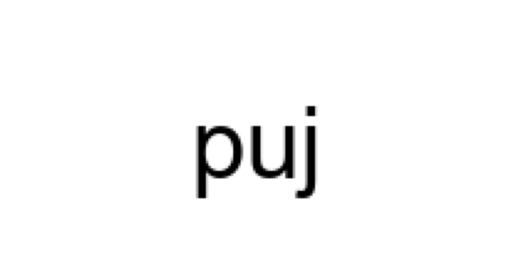

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import convolve2d
import os

NUM_SAMPLES = 10
GENERATED_PATH = "../Results/Generated_Captcha"

real_images = []

for i in range(NUM_SAMPLES):
    image = cv2.imread(os.path.join(GENERATED_PATH, f"{i+1:02d}.png"))
    if image is None:
        print("Error: Image {i+1:02d}.png not found or path is incorrect")
    else:
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        real_images.append(rgb_image)
        print(f"Image {i+1:02d}.png loaded successfully")
        plt.imshow(rgb_image)
        plt.axis("off")
        plt.show()



## salt and pepper noise

<div dir="rtl">
به عکس های درست شده salt and pepper noise اضافه می کنیم و در folder ای به نام Noise_Captcha در Results قرار می دهیم.

In [5]:
def add_salt_and_pepper_noise(image, salt_prob=0.1, pepper_prob=0.1):
    noisy_image = image.copy()
    total_pixels = noisy_image.size

    num_salt = int(total_pixels * salt_prob)
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in noisy_image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in noisy_image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image



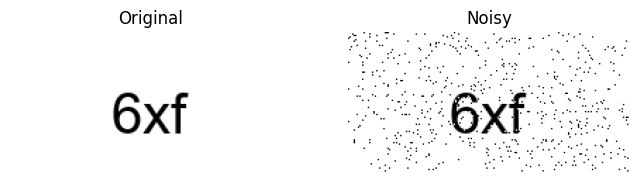

Add Noise to Image 01.png successfully and saved to ../Results/Noise_Captcha\01.png


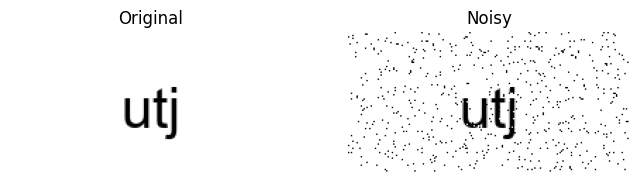

Add Noise to Image 02.png successfully and saved to ../Results/Noise_Captcha\02.png


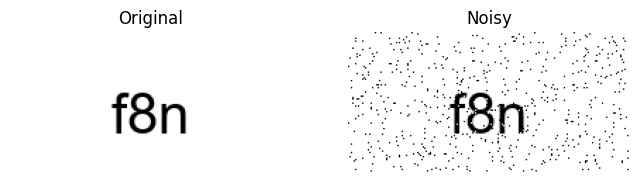

Add Noise to Image 03.png successfully and saved to ../Results/Noise_Captcha\03.png


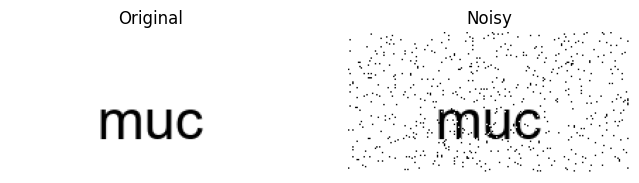

Add Noise to Image 04.png successfully and saved to ../Results/Noise_Captcha\04.png


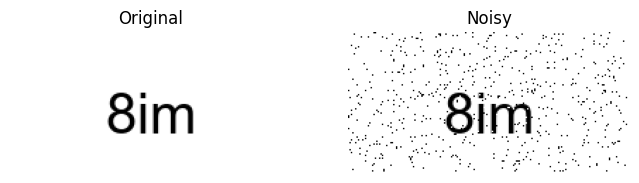

Add Noise to Image 05.png successfully and saved to ../Results/Noise_Captcha\05.png


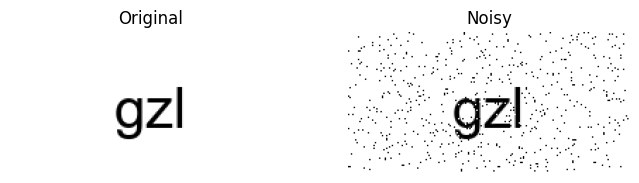

Add Noise to Image 06.png successfully and saved to ../Results/Noise_Captcha\06.png


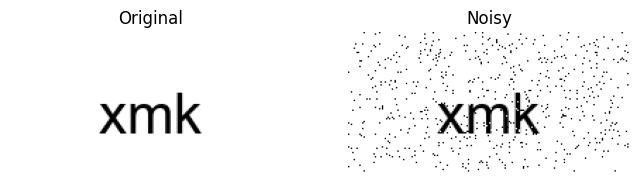

Add Noise to Image 07.png successfully and saved to ../Results/Noise_Captcha\07.png


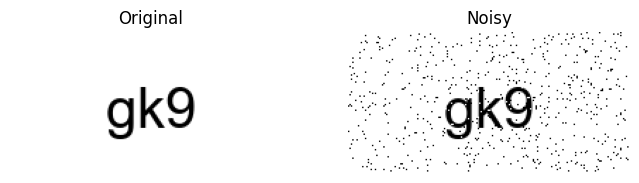

Add Noise to Image 08.png successfully and saved to ../Results/Noise_Captcha\08.png


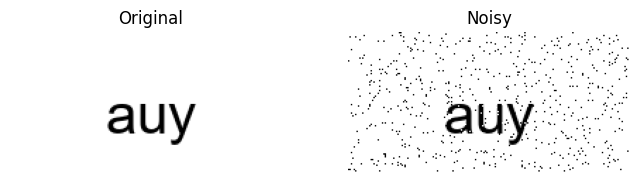

Add Noise to Image 09.png successfully and saved to ../Results/Noise_Captcha\09.png


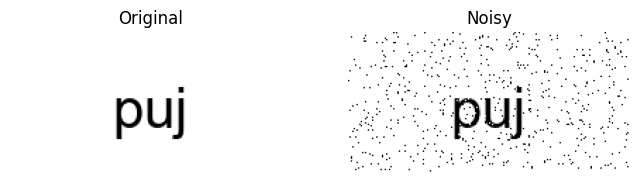

Add Noise to Image 10.png successfully and saved to ../Results/Noise_Captcha\10.png


In [6]:
NOISE_PATH = "../Results/Noise_Captcha"
os.makedirs(NOISE_PATH, exist_ok=True)

noise_images = []

for i in range(NUM_SAMPLES):
    image = real_images[i]

    if image is None:
        print(f"Error: Image {i+1:02d}.png not found or path is incorrect")
        continue
    salt_and_pepper_noisy_image = add_salt_and_pepper_noise(image, 0.01, 0.01 )
    noise_images.append(salt_and_pepper_noisy_image)
    plt.figure(figsize=(8,4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(salt_and_pepper_noisy_image, cv2.COLOR_BGR2RGB))
    plt.title("Noisy")
    plt.axis("off")

    plt.show()
    save_path = os.path.join(NOISE_PATH, f"{i+1:02d}.png")
    cv2.imwrite(save_path, salt_and_pepper_noisy_image)

    print(f"Add Noise to Image {i+1:02d}.png successfully and saved to {save_path}")


## Bluring

<div dir="rtl">
هم می توانیم از کرنل Averaging Blur (یا همون Box Blur که همشون یک هستن) استفاده کنیم و هم از Gaussian Blur استفاده کنیم که کمی طبیعی تر است.

من در اینجا از 9 تا 1 استفاده کردم.

ما برای این بخش از **Box Blur** استفاده کردیم چون ساده‌ترین و مستقیم‌ترین روش برای مات کردن تصویره و دقیقاً همون کاری رو انجام می‌ده که می‌خوایم: پیکسل‌های اطراف رو با هم میانگین می‌گیره و جزئیات رو محو می‌کنه. برخلاف Gaussian که وزن‌دهی پیچیده‌تری داره و بیشتر برای حفظ کیفیت و جزئیات لبه‌هاست، Box Blur بدون هیچ دردسری کل ناحیه رو یکنواخت‌تر و صاف‌تر می‌کنه. همچنین این کرنل نویز کمتری رو نسبت به کرنل گوسی حذف می کنه در نتیجه در خروجی که مدنظر ما هست برای قسمت اول که باید نویز داشته باشه بهتره.

### Manual

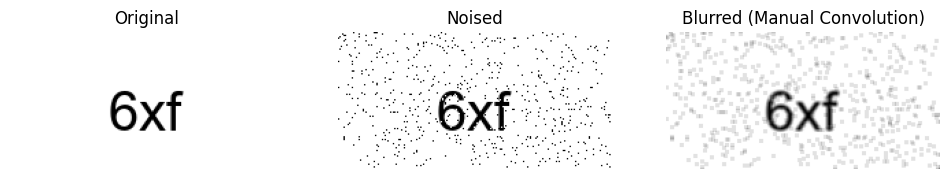

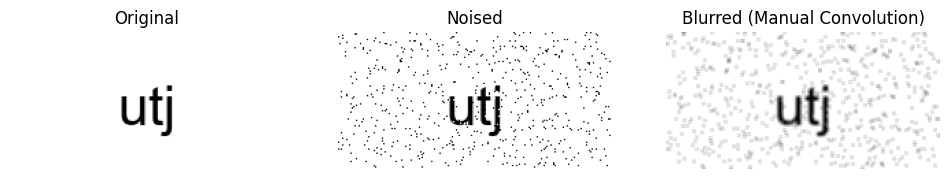

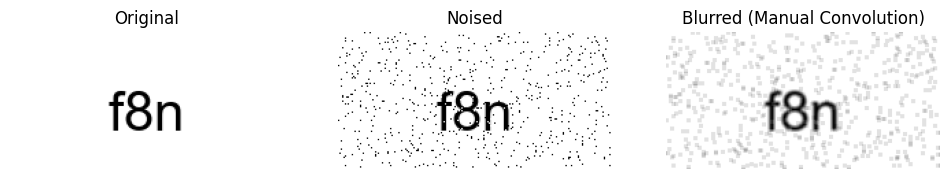

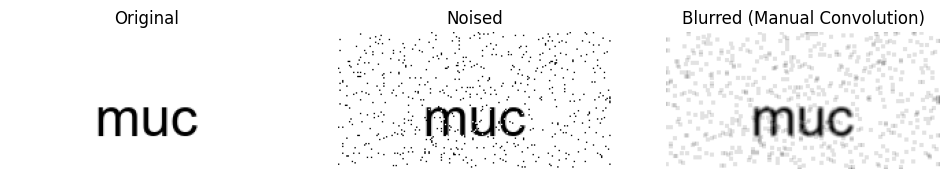

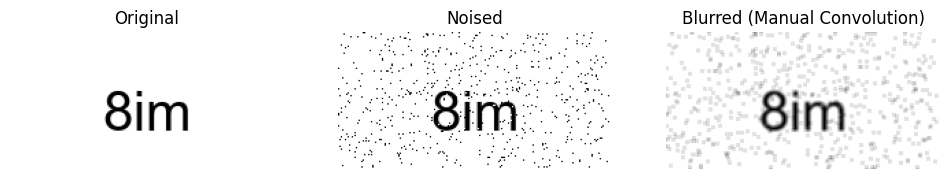

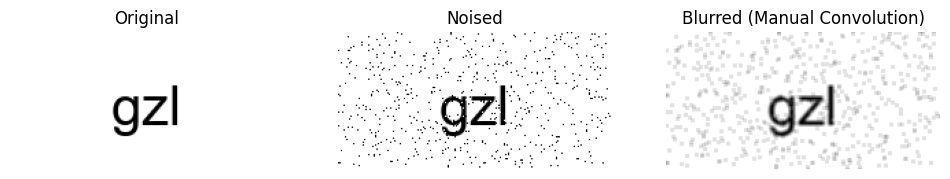

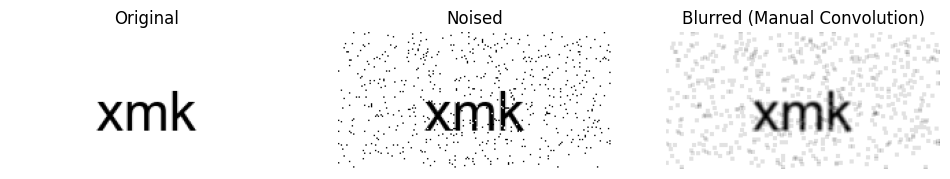

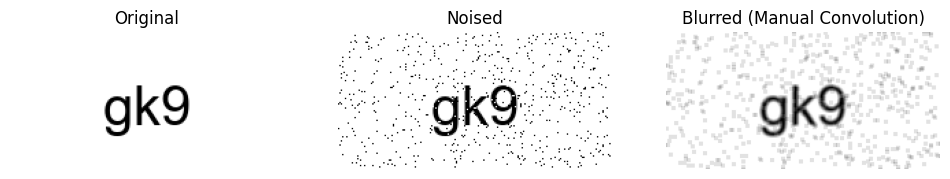

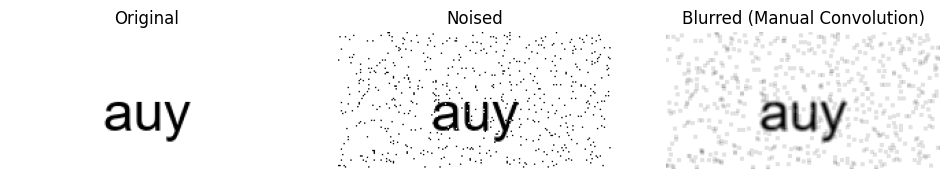

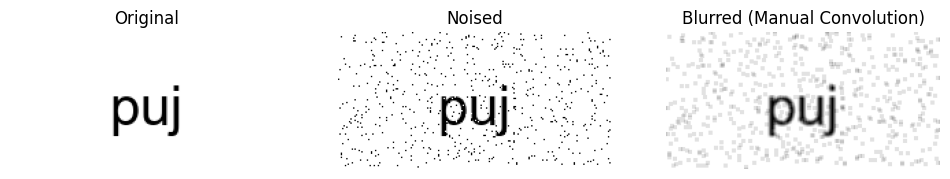

In [7]:
BLUR_PATH = "../Results/Blur_Captcha"
os.makedirs(BLUR_PATH, exist_ok=True)

KERNEL_SIZE = 3

kernel = np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32) / (KERNEL_SIZE ** 2)

def manual_blur(image, kernel):
    h, w, c = image.shape
    k = kernel.shape[0] // 2
    padded = np.pad(image, ((k, k), (k, k), (0, 0)), mode='reflect')

    output = np.zeros_like(image)

    for y in range(h):
        for x in range(w):
            for ch in range(c):
                region = padded[y:y+kernel.shape[0], x:x+kernel.shape[1], ch]
                output[y, x, ch] = np.sum(region * kernel)

    return output



blurred_images = []


for i in range(NUM_SAMPLES):
    image = noise_images[i]
    original_image = real_images[i]

    if image is None:
        print(f"Error: Image {i+1:02d}.png not found")
        continue

    blurred = manual_blur(image, kernel)
    blurred_images.append(blurred)

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.imshow(original_image)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.title("Noised")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(blurred)
    plt.title("Blurred (Manual Convolution)")
    plt.axis("off")

    plt.show()

    # cv2.imwrite(os.path.join(BLUR_PATH, f"{i+1:02d}.png"), blurred)


### Not Manual

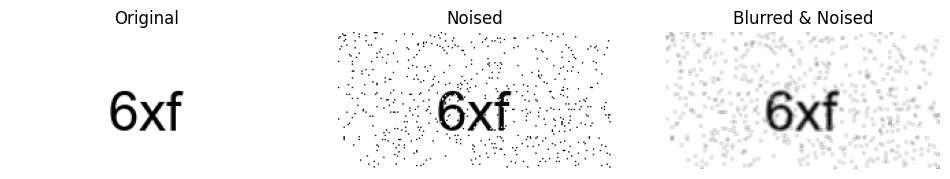

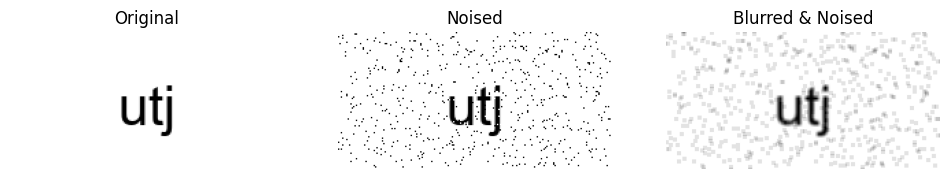

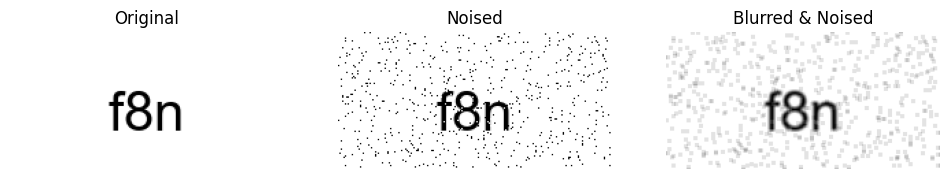

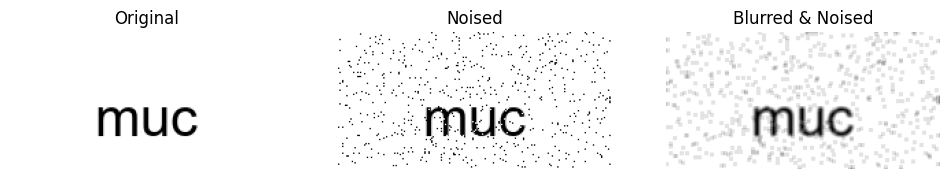

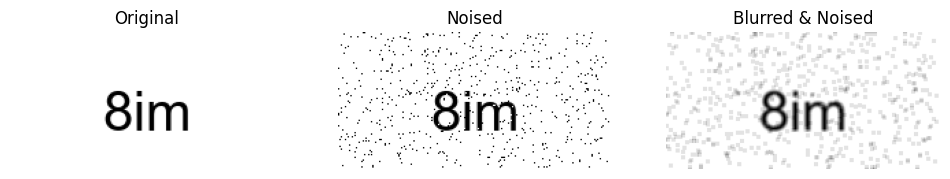

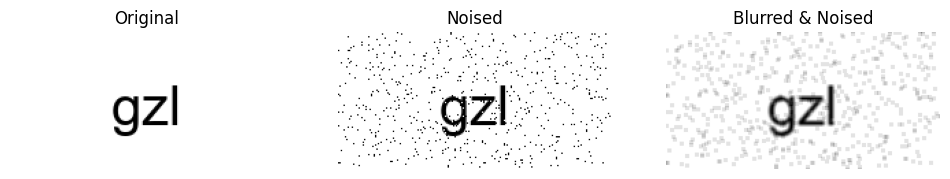

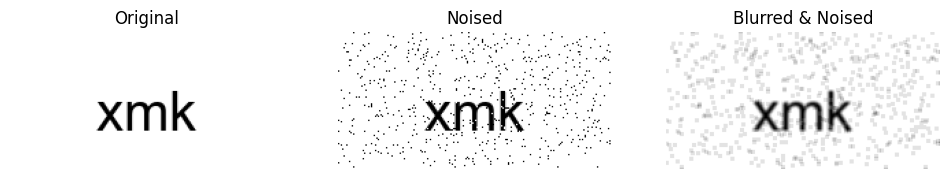

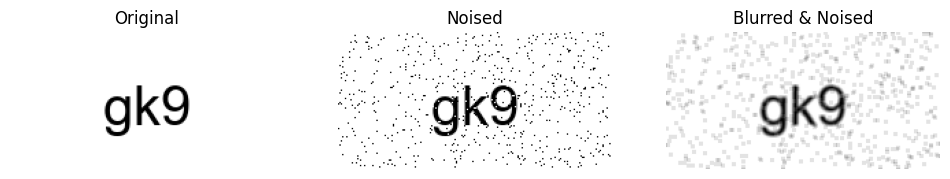

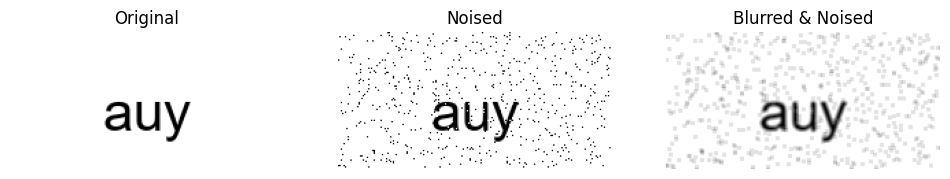

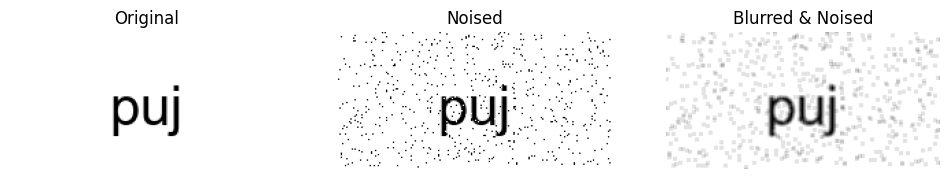

In [8]:
BLUR_PATH = "../Results/Blur_Captcha"
os.makedirs(BLUR_PATH, exist_ok=True)

KERNEL_SIZE = 3

kernel = np.ones((KERNEL_SIZE, KERNEL_SIZE), np.float32) / (KERNEL_SIZE ** 2)

blurred_images = []

for i in range(NUM_SAMPLES):
    image = noise_images[i]
    
    orginal_image = real_images[i]

    if image is None:
        print(f"Error: Image {i+1:02d}.png not found")
        continue

    blurred = cv2.filter2D(image, -1, kernel)
    blurred_images.append(blurred)

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(orginal_image)
    plt.title("Original")
    plt.axis("off")
    
    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.title("Noised")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(blurred)
    plt.title("Blurred & Noised")
    plt.axis("off")
    plt.show()

    cv2.imwrite(os.path.join(BLUR_PATH, f"{i+1:02d}.png"), blurred)
